In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [4]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')
# df = pd.read_csv(filename, skipfooter=2, engine='python')

In [5]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [6]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,footnoteSeqID,Footnote,NaN,NaN
6730,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [13]:
gdp_df = gdp_df[:-2]
# turn back on when reruning file

In [8]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

#### 6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [9]:
gdp_df.columns = ["Country", "Year", "GDP_Per_Capita"]

#### 7. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [96]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5334 non-null   object 
 1   Year            5334 non-null   int32  
 2   GDP_Per_Capita  5334 non-null   float64
 3   Continent       5334 non-null   object 
dtypes: float64(1), int32(1), object(2)
memory usage: 187.5+ KB


In [14]:
gdp_df.Year = gdp_df.Year.astype(int)

#### 8. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [15]:
gdp_df['Year'].value_counts().sort_index()

1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Year, dtype: int64

There are not the same amount of data points per year.

#### 9. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [16]:
gdp_df['Country'].value_counts()
#gdp_df.groupby('Country')['Year'].nunique()

Paraguay                     29
United Kingdom               29
Romania                      29
Lebanon                      29
IDA only                     29
                             ..
Nauru                        12
Sint Maarten (Dutch part)     9
Turks and Caicos Islands      8
South Sudan                   8
Djibouti                      1
Name: Country, Length: 243, dtype: int64

Nauru, Saint Maarten (Dutch part), Turks & Caicos Islands, South Sudan, Djibouti are least represented. Newly recognized countries and data not captured until more recently.     

#### 10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [17]:
gdp_2014 = gdp_df[gdp_df['Year']== 2014]

#### 11. Use .describe() to find the summary statistics for GDP per capita in 2014.

In [18]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


#### 12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

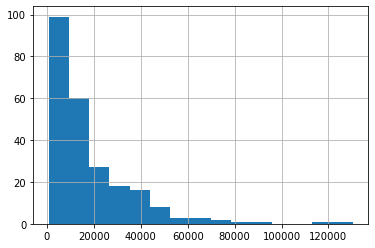

In [19]:
gdp_2014['GDP_Per_Capita'].hist(bins=15);

right skewed

#### 13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [20]:
# to sort by GDP_per_capita
gdp_2014.sort_values('GDP_Per_Capita', axis=0, ascending = False)

,Country,Year,GDP_Per_Capita
3639,"Macao SAR, China",2014,130439.106674
5003,Qatar,2014,116693.507701
3610,Luxembourg,2014,92349.186429
5316,Singapore,2014,81965.361071
707,Brunei,2014,76448.593329
...,...,...,...
3697,Malawi,2014,1142.530804
4414,Niger,2014,900.136918
1375,Dem. Rep. Congo,2014,784.872656
794,Burundi,2014,768.469837


#### 14. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [21]:
gdp_pivoted = gdp_df.pivot_table(columns=['Year'], index=['Country'], values='GDP_Per_Capita')[[1990, 2017]].dropna()

In [22]:
gdp_pivoted.head()

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104


#### 15. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [23]:
gdp_pivoted['Percent_Change'] = gdp_pivoted.apply(lambda x: (100*(x[2017]-x[1990]))/x[1990], axis=1)

In [24]:
gdp_pivoted.head()

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972


#### 16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [101]:
len(gdp_pivoted[gdp_pivoted['Percent_Change'] < 0])
# or gdp_pivoted[gdp_pivoted['Percent_Change']< 0]['Percent_Change'].count()


20

#### 17. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

In [26]:
gdp_pivoted.sort_values(by='Percent_Change', ascending=False).head(2)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464
China,1521.963868,15253.993071,902.257241


In [107]:
gdp.df[gdp_df['Country'] == 'Equatorial Guinea' 
       & gdp_df['Year'] >= '1990'
       & gdp_df['Year'] <= '2017'][va.plot()
                                   
                                   

NameError: name 'gdp' is not defined

#### 18. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [27]:
continents = pd.read_csv('../data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


#### 19. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [43]:
gdp_df = pd.merge(gdp_df,continents, on = 'Country',how='inner')

#### 20. Determine the number of countries per continent. Create a bar chart showing this.

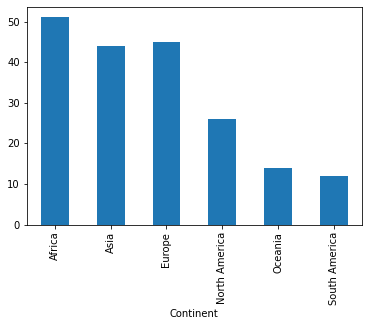

In [44]:
gdp_df.groupby('Continent')['Country'].nunique().plot(kind='bar');

#### 21. Creat a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

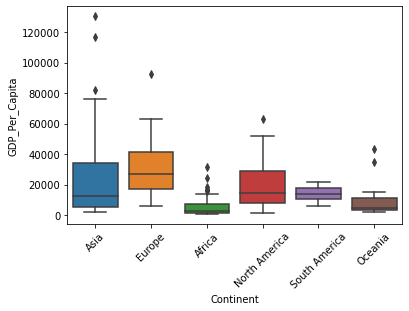

In [61]:
sns.boxplot(data = gdp_df[gdp_df['Year']==2014], x= 'Continent', y='GDP_Per_Capita')
plt.xticks(rotation=45);

#### 22. Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [90]:
internet_df = pd.read_csv('../data/internet_use.csv', error_bad_lines=False)

b'Skipping line 4675: expected 4 fields, saw 6\n'


In [91]:
internet_df = internet_df[0:4495]
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


#### 23. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [92]:
internet_df = internet_df.drop('Value Footnotes', axis = 1)
internet_df.columns = ["Country", "Year", "Internet_Users_Pct"]


In [93]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


#### 24. How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.

In [94]:
internet_df.shape

(4495, 3)

In [98]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int32  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 87.9+ KB


In [97]:
internet_df.Year = internet_df.Year.astype(int)

#### 25. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

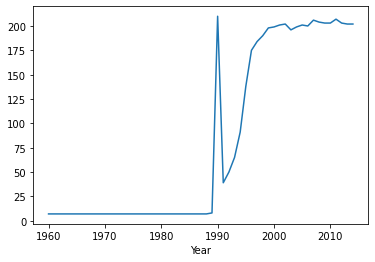

In [103]:
internet_df.groupby('Year')['Internet_Users_Pct'].count().plot();

#### 26. Merge gdf_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.

In [ ]:
#gdp_and_internet_use = gdf_df and internet_df Country and Year 
#not finished


#### 26 - Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

#### 27. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

#### 28. Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. What is the mean internet users percentage in 2014? How many countries have at least 90% internet users in 2014?

#### 29. Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these five countries. Each individual figure in the facet grid will represent a single country. What trends do you notice?